<h1>Exemplo de Regressão Linear Simples</h1>

Carregando bibliotecas:

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carregando dataset:

In [115]:
# dados criados apenas para exemplo de LR simples
data = pd.read_csv('data_for_lr.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


<h2>Pré-processamento dos dados</h2>

Há dados faltantes?

In [116]:
data.isnull().sum()

x    0
y    1
dtype: int64

Qual linha?

In [117]:
data[data.isna().any(axis=1)]

,x,y
213,3530.157369,NaN


Remover linhas com dados faltantes

In [118]:
data = data.dropna()

<h2>Visualizando os dados</h2>

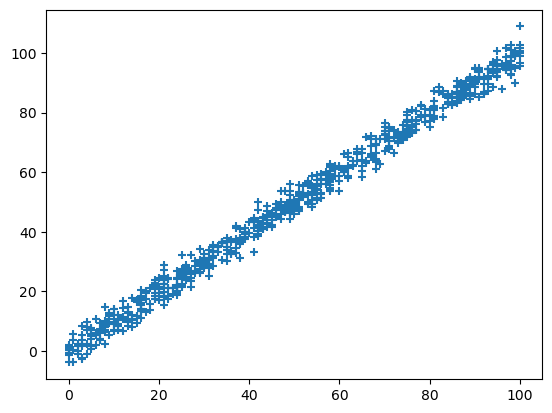

In [119]:
plt.scatter(data['x'], data['y'], marker='+')

<h2>Dividindo em treino/teste </h2>

In [120]:
from sklearn.model_selection import train_test_split

x_val = data['x'].values.reshape(-1,1)
y_val = data['y']

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.3, random_state=42)

<h2>Fazendo a regressão:</h2>

In [121]:
from sklearn.linear_model import LinearRegression

# regressão (treinamento)
my_model = LinearRegression()
my_model.fit(x_train, y_train)
print("R_squared =", my_model.score(x_test, y_test)) # r2 squared

#regressão (teste)
test_pred = my_model.predict(x_test)

R_squared = 0.9910007028176463


<h3>Analisando resultados</h3>

Plotando o gráfico da regressão para dados de teste:

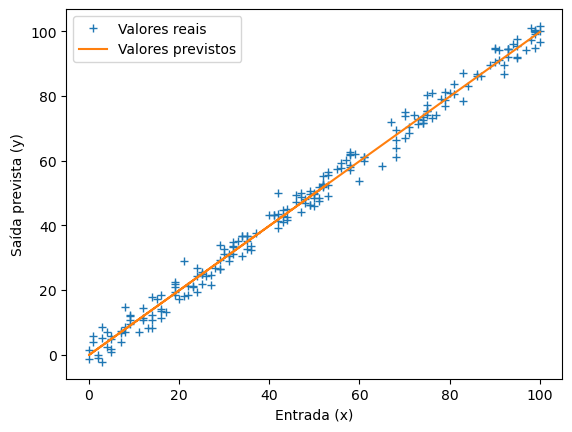

In [122]:
plt.plot(x_test, y_test, '+', label='Valores reais')
plt.plot(x_test, test_pred, '-', label='Valores previstos')
plt.xlabel('Entrada (x)')
plt.ylabel('Saída prevista (y)')
plt.legend()
plt.show()

In [123]:
from sklearn import metrics

def print_evaluate(real, predicted):
    mae = metrics.mean_absolute_error(real, predicted)
    mape = metrics.mean_absolute_percentage_error(real, predicted)
    mse = metrics.mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(real, predicted)
    
    print("MAE:", mae)
    print("MAPE:", mape)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R2 Square:", r2_square)

In [124]:
print("Dados de teste:")
print_evaluate(y_test, test_pred)

Dados de teste:
MAE: 2.262334175425182
MAPE: 0.23850437549796466
MSE: 7.812343859278612
RMSE: 2.7950570404338104
R2 Square: 0.9910007028176463


<h3>Qual equação foi gerada durante a regressão?</h3>

In [125]:
print(my_model.intercept_, my_model.coef_, my_model.score(x_test, y_test))

-0.0979423209232877 [0.999368] 0.9910007028176463


Isso seria o mesmo que dizer que a equação obtida pela regressão é aproximadamente:
<h4>y = -0.0979423209232877 + 0.999368 * x</h4>

E que o valor do coeficiente de determinação (R²) do modelo é 99.1, o que significa que 99.1% da variação de y pode ser explicada variação de x. Quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra (varia entre 0 e 1).
